In [1]:
import os
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from dateutil.parser import parse
from tqdm import tqdm
from typing import Tuple, List
import gzip
import numpy as np
from sklearn.model_selection import train_test_split
from glob import glob 
from dateutil import parser
import dateutil
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
base_path = "../data/Data DigitalFreud/final_data/"
base_info_path = '1/item1.csv'

base_info_file = os.path.join(base_path, base_info_path)
base_info = pd.read_csv(base_info_file)

In [3]:
base_info = base_info[(base_info.who_score.notna()) & (base_info.diener_score.notna())]

In [4]:
base_info

,userid_encrypted,vk_id_encrypted,who_1,who_2,who_3,who_4,who_5,who_score,diener_1,diener_2,diener_3,diener_4,diener_5,diener_score,sex,birthyear,education,employment,marital_status,freud_install_time
0,fa375bc4-a5ce-23df-7400-5c51954d4886,745443180,4.0,3.0,3.0,4.0,3.0,13.0,3.0,5.0,5.0,3.0,6.0,13.0,male,1984.0,"Среднее, сейчас не учусь",NaN,NaN,2018-06-12 06:40:08
1,fa09a81a-bc78-2f64-704b-8e0fb2cf5242,677093196,2.0,3.0,1.0,5.0,3.0,16.0,6.0,2.0,1.0,2.0,5.0,19.0,female,1996.0,"Неоконченное высшее, учусь",NaN,NaN,2018-06-26 13:01:22
2,fa745c06-e879-205a-5780-445bebd6ca3d,188075273,4.0,4.0,4.0,3.0,1.0,14.0,2.0,2.0,1.0,1.0,4.0,25.0,female,1995.0,"Бакалавр, сейчас не учусь",NaN,NaN,2018-07-08 08:33:11
3,fa5a0f03-8888-2d6f-7381-5300d0f370f6,95556615,3.0,3.0,3.0,3.0,3.0,15.0,5.0,5.0,5.0,5.0,5.0,10.0,male,2000.0,secondary,student,in_relationship,2018-09-13 07:45:18
4,fa52b45a-507a-20e3-6c4e-c158b74f4347,435358060,3.0,3.0,5.0,4.0,3.0,12.0,5.0,1.0,3.0,3.0,1.0,22.0,female,1999.0,"Неоконченное высшее, учусь",NaN,NaN,2018-06-28 18:57:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,05a7abfd-4b91-2e42-44db-7d830d6809fa,954555625,2.0,3.0,3.0,3.0,3.0,16.0,5.0,5.0,1.0,5.0,4.0,15.0,female,1997.0,"Неоконченное высшее, учусь",NaN,NaN,2018-08-27 01:15:08
2036,05bb8881-3a62-2bf2-709e-9217d7abc16e,849073825,3.0,2.0,3.0,3.0,4.0,15.0,3.0,2.0,2.0,3.0,4.0,21.0,NaN,NaN,NaN,NaN,NaN,2018-03-27 08:28:00
2038,05ec148b-67f3-2b4d-71c9-53bee209805e,694243187,4.0,4.0,4.0,4.0,4.0,10.0,5.0,2.0,2.0,5.0,5.0,16.0,female,1995.0,secondary_special,unemployed,in_relationship,2019-09-05 05:32:31
2039,05e570f2-e074-219e-42da-d5117d5b13c3,418940323,2.0,0.0,1.0,4.0,4.0,19.0,5.0,4.0,5.0,5.0,5.0,11.0,female,2000.0,other,unemployed,single,2019-03-27 11:48:09


In [5]:
base_info.who_score = base_info.who_score - 5.
base_info.who_score.unique()

array([ 8., 11.,  9., 10.,  7., 18., 25.,  5., 12., 13., 16., 17., 14.,
       15., 19., 20.,  2.,  6.,  4.,  0.,  3., 21., 23., 22.,  1., 24.])

In [6]:
base_info.diener_score = base_info.diener_score - 5.
base_info.diener_score.unique()

array([ 8., 14., 20.,  5., 17., 19., 22.,  4., 10., 28., 21.,  9., 11.,
       23., 24., 26.,  7., 13., 15.,  1., 12.,  2., 16.,  6.,  3., 27.,
       18., 25.,  0., 29., 30.])

In [7]:
files = glob("../data/Data DigitalFreud/final_data/6/*")

In [8]:
with gzip.open(files[0], 'r') as f_in:            
    original_texts = pd.read_csv(f_in)

In [9]:
original_texts.head()

,owner_id_encrypted,post_id,text,repost,text_original,date,comments,likes,from_id_encrypted,reply_owner_id_encrypted,reposters,reposts_count,attachments
0,712640790,850,NaN,False,NaN,2014-02-16 21:02:04,0,0,348622935,NaN,NaN,0,NaN
1,712640790,859,NaN,True,#horse,2014-03-19 16:36:28,0,0,712640790,-617955783.0,NaN,0,NaN
2,712640790,860,NaN,True,"Мы многое усложняем. То, к чему можно отнестис...",2014-03-31 09:54:00,0,0,712640790,-815583916.0,NaN,0,NaN
3,712640790,862,NaN,True,NaN,2014-04-14 16:27:38,0,0,712640790,-749839091.0,NaN,0,NaN
4,712640790,865,Актуально,False,NaN,2014-05-09 08:20:46,0,0,712640790,NaN,NaN,0,NaN


In [10]:
def get_user_texts(file, add_post_text = False) -> Tuple[int, List[str], List[str]]:
    
    id_field = "owner_id_encrypted"
    from_id_field = "from_id_encrypted"
    text_field = "text"
    text_post_field = "text_original"
    date_field = "date"
    
    def join_texts(x):
        "Обединяет ячейки с текстом пользователя к посту и текстом поста"
        user_text = x[text_field]
        repost_test = x[text_post_field]

        if not isinstance(user_text, str):
            user_text = ''

        if not isinstance(repost_test, str):
            repost_test = ''
        
        return str(user_text + ' ' + repost_test)

    
    with gzip.open(file, 'r') as f_in:            
        original_texts = pd.read_csv(f_in)
    
    user_ids = original_texts[id_field].unique()
    
    if len(user_ids) != 1: 
        print('many user ids')
        
    user_id = user_ids[0]
    
    if not add_post_text:
    
        # filter by user origin id and check that post was written by this user
        filter_by_user = original_texts[
            (original_texts[id_field] == user_id) & 
            (original_texts[from_id_field] == user_id) &
            (original_texts.repost == False)
            
        ]
        needed_fields = filter_by_user[[date_field, id_field, text_field]]
        needed_fields = needed_fields.dropna()

        if needed_fields.empty:
            return None

        res = (
            user_id, 
            needed_fields[text_field].tolist(), 
            needed_fields[date_field].tolist()
        )

        assert len(res[1]) == len(res[2]), "len(dates)!=len(texts)"

        return res
    
    "По флагу добавляем тексты постов к тексту пользвотеля об этом посте"
    if add_post_text:
    
        # filter by user origin id and check that post was written by this user
        filter_by_user = original_texts[
            (original_texts[id_field] == user_id) & 
            (original_texts[from_id_field] == user_id)
            
        ]
        needed_fields = filter_by_user[[date_field, id_field, text_field, text_post_field]]
        
        if needed_fields.empty:
            return None
        
        needed_fields["join_texts"] = needed_fields.apply(join_texts, axis = 1)
        
        needed_fields = needed_fields[["join_texts", date_field, id_field]]
        needed_fields = needed_fields.dropna()

        if needed_fields.empty:
            return None
        
        filtred_texts, filtered_dates = [], []
        for text, date in zip(needed_fields["join_texts"].tolist(),  needed_fields[date_field].tolist()):
            if text != ' ':
                filtred_texts.append(text.replace('\n', ' '))
                filtered_dates.append(date)
        res = (
            user_id, 
            filtred_texts,
            filtered_dates
        )

        assert len(res[1]) == len(res[2]), "len(dates)!=len(texts)"

        return res
    

In [11]:
get_user_texts(files[18], True)

(858012269,
 [' Начинаем НОВЫЙ ГОД с выигрыша КРУТЫХ КОМИКСОВ! У нас тут крутой конкурс-репост на 3 ЧУМОВЫХ Комикса! Готов? Тогда делай репост и выполняй простые условия:    1. Да-да, сделать репост этой записи!  2. Быть подписчиком нашего паблика и паблика спонсора [club173397089|Вселенная Комиксов с Book24]!  3. Ждать ТРИ даты: 4, 5 и 6! В эти дни будут разыграны книги по порядку!    Первый отозвавшийся сможет выбрать из трех комиксов, второй отозвавшийся победитель из двух, третий получает оставшийся) Все просто. Репост нужно сделать ОДИН раз, НО не удалять его до конца розыгрыша (до 6 января). Итоги публикуются на стене паблика, под конкурсом оставляется ссылка на итоги. Просто дождитесь, когда она появится)    Все поняли? ДЕРЗАЙТЕ! 3 победителя, 3 даты! КРУТЫЕ ПОДАРКИ.',
  ' Мало кто это знает, но у Сатаны есть официальный твиттер.',
  ' Аааафрврваара😆  #sherlock #johnlock #johnwatson #sherlockholmes #holmeswatson #johnlockisreal #freebatch',
  ' Главное — стать лучшим в своей обл

In [12]:
def join_text_and_score(base_info, files, use_post_text=False, period=1, target_type="diener_score"):
    user_ids = base_info["vk_id_encrypted"].unique()
    f_texts, f_users, f_score = [], [], []
    for file in tqdm(files):
        res = get_user_texts(file, use_post_text)

        if res is None:
            continue    

        user_id, texts, dates = res

        if user_id in user_ids:
            score = base_info[base_info["vk_id_encrypted"] == user_id][target_type].values[0]
            right_boundary = base_info[base_info["vk_id_encrypted"] == user_id]["freud_install_time"].values[0]
            right_boundary = parser.parse(right_boundary)
            left_boundary = right_boundary - dateutil.relativedelta.relativedelta(years=1)
            if score and texts:
                texts_filtered_by_dates = []
                for text, date in zip(texts, dates):
                    if left_boundary <= parser.parse(date) <= right_boundary:
                        texts_filtered_by_dates.append(text)
                if texts_filtered_by_dates:    
                    f_texts.append(" ".join(texts_filtered_by_dates))
                    f_users.append(user_id)
                    f_score.append(score)

    join_data= pd.DataFrame({"f_texts": f_texts, "f_users": f_users, "f_score": f_score})
    join_data = join_data.dropna()
    return join_data
    

## Experiments

### Diener Score ### Only author text 

In [13]:
join_data = join_text_and_score(base_info, files, use_post_text=False, period=1, target_type="diener_score")

100%|██████████| 1874/1874 [00:32<00:00, 58.26it/s]


In [14]:
join_data

,f_texts,f_users,f_score
0,За последнюю неделю у меня 8 гостей. А у тебя?...,402566611,12.0
1,Да сгинет враг и всё чуждое душе твоей!\nПусть...,323958149,12.0
2,"Ребят, а как подводить итоги дня? По результат...",235794648,12.0
3,"Что ж, все пишут посты про ушедшего лета, а че...",772541945,16.0
4,👂в комментарии к этому посту буду кидать треки...,354730052,14.0
...,...,...,...
738,🐚🌊💙 С Днем рождения любимый город) 😊🤗😌 3⃣1⃣4⃣...,443786991,18.0
739,Owl My ❤️\n#vetdoctor #vetanestesia #anesthesi...,107383222,11.0
740,❤,1089813,6.0
741,Я: Ой чота мне грусна(\nЯ: *Ненавидит себя*\nЯ...,498958507,10.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    join_data["f_texts"],
    join_data["f_score"], 
    test_size=0.2,
    random_state=42
)

In [16]:
def plot_target_ditribution(targets, postfix="diener", y_lim = (0, 40)):
    
    y_name = f'BeWell Score - "{postfix}"'
    plt.title("Target distributions")
    plt.scatter(range(len(targets)), targets)
    plt.ylabel(y_name)
    plt.xlabel('User id indecies')
    plt.ylim(y_lim)
    plt.show()
    
    
    plt.boxplot(targets)
    plt.ylabel(y_name)
    plt.ylim(y_lim)
    plt.show()
    
    plt.hist(targets, bins=len(set(targets)))
    plt.ylabel("Frequence of value in dataset")
    plt.xlabel('Differrent score values')   
    plt.show()
    
def plot_two_distributions(predicted, targets):
    plt.hist(predicted, bins=len(set(targets)), color="red", label='predict')
    plt.hist(targets, bins=len(set(targets)), color="blue", label='target')
    plt.legend()
    plt.ylabel("Frequence of value in dataset")
    plt.xlabel('Differrent score values')   
    plt.show()

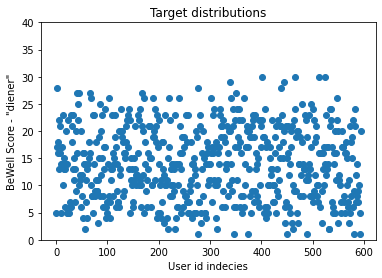

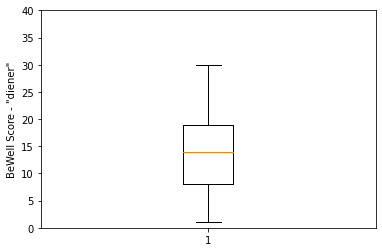

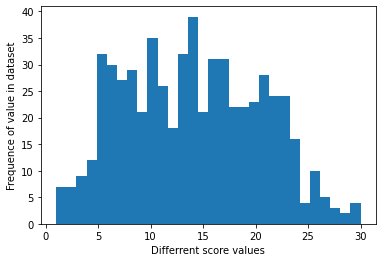

In [17]:
plot_target_ditribution(y_train)

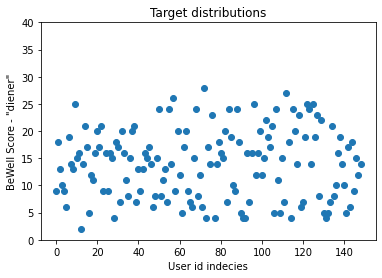

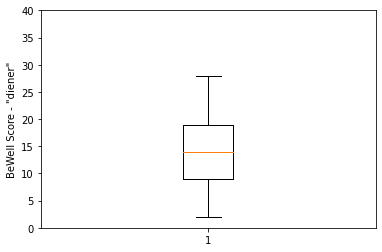

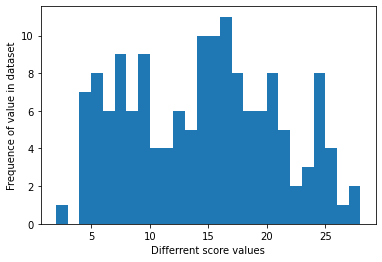

In [18]:
plot_target_ditribution(y_test)

In [19]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(
               lowercase = True, 
               ngram_range = (1,3), 
               #max_features = 900,
               max_df = 0.95,
               min_df = 5,
               #analyzer = "char"
            )
    ), 
    ('pca', TruncatedSVD(500)), 
    ('lr', Ridge())
])
pipe.fit(X_train, y_train)
predicted_y = pipe.predict(X_test)

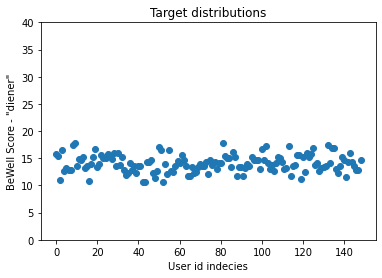

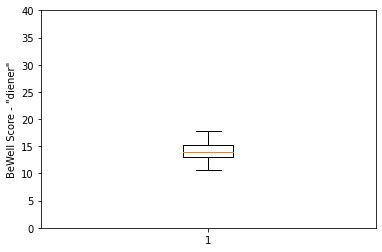

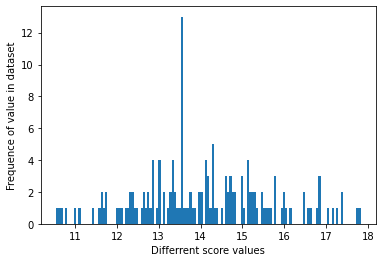

In [20]:
plot_target_ditribution(predicted_y, y_lim=(0,40))

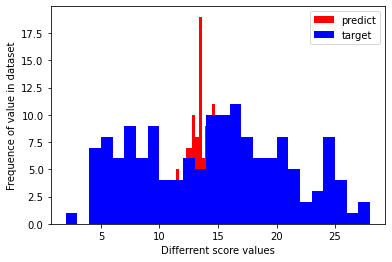

In [21]:
plot_two_distributions(predicted_y, y_test)

In [22]:
def get_metrics(predicted_y, y_test):
    mse = mean_squared_error(predicted_y, y_test)
    mae = mean_absolute_error(predicted_y, y_test)
    r = r2_score(predicted_y, y_test)
    sperman_corr, sperman_p = stats.pearsonr(predicted_y, y_test)
    print ("Report:")
    print (f"mean_squared_error: {mse}\nmean_absolute_error: {mae}\nr2_score {r}")
    print (f"pearsonr_corr: {sperman_corr}, pearsonr_p: {sperman_p}")
    print ()
    
get_metrics(predicted_y, y_test)

Report:
mean_squared_error: 38.92323015192537
mean_absolute_error: 5.2599136746962465
r2_score -14.422574303074226
pearsonr_corr: 0.17777597814791227, pearsonr_p: 0.030077739594213098



### Test Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
pipe_lr = Pipeline([
    ('tf', TfidfVectorizer(
               lowercase = True, 
               ngram_range = (1,3), 
               #max_features = 900,
               max_df = 0.95,
               min_df = 5,
               #analyzer = "char"
            )
    ), 
    ('pca', TruncatedSVD(500)), 
    ('lr', LogisticRegression())
])
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(max_df=0.95, min_df=5, ngram_range=(1, 3))),
                ('pca', TruncatedSVD(n_components=500)),
                ('lr', LogisticRegression())])

In [24]:
predicted_y_log = pipe_lr.predict(X_test)

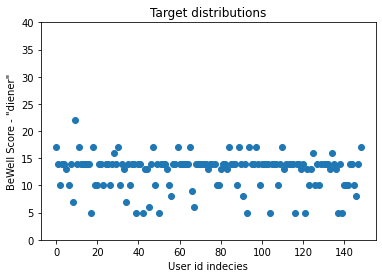

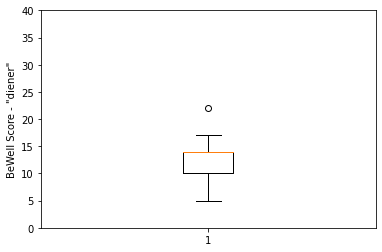

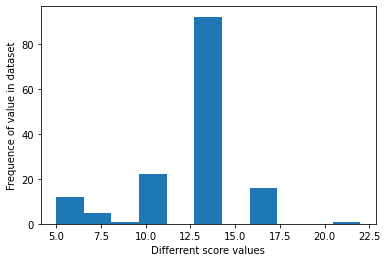

In [25]:
plot_target_ditribution(predicted_y_log, y_lim=(0,40))

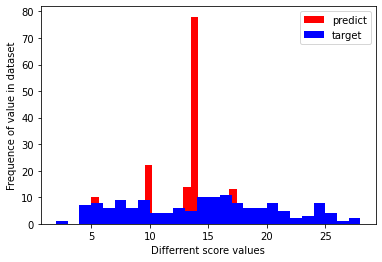

In [26]:
plot_two_distributions(predicted_y_log, y_test)

In [27]:
get_metrics(predicted_y_log, y_test)

Report:
mean_squared_error: 51.986577181208055
mean_absolute_error: 6.080536912751678
r2_score -4.231696040034813
pearsonr_corr: -0.006967998971653577, pearsonr_p: 0.9327861360735774



In [28]:
from sklearn.metrics import classification_report
print(classification_report(predicted_y_log, y_test))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00        10
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         3
         9.0       0.00      0.00      0.00         1
        10.0       0.25      0.05      0.08        22
        11.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00        14
        14.0       0.50      0.06      0.11        78
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         3
        17.0       0.12      0.08      0.10        13
        18.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         0
        20.0       0.00    

### Who score

100%|██████████| 1874/1874 [00:29<00:00, 62.78it/s]


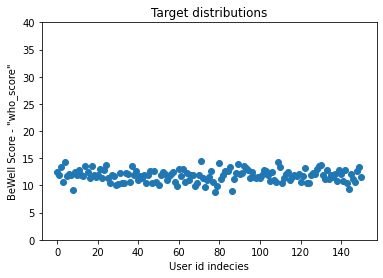

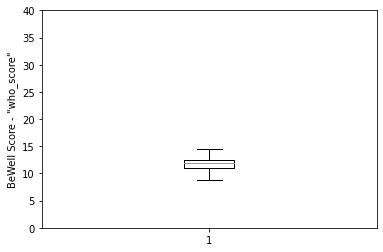

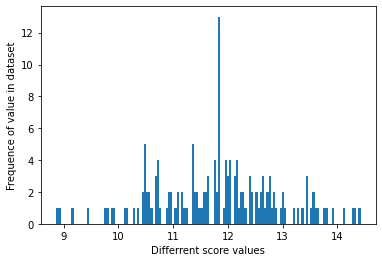

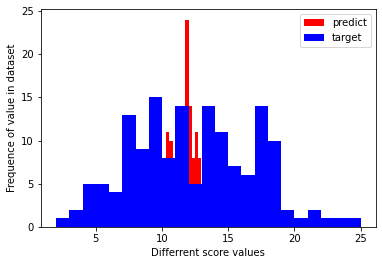

Report:
mean_squared_error: 22.537485715889716
mean_absolute_error: 3.9446296504767004
r2_score -17.33030721049972
pearsonr_corr: 0.027607554258519018, pearsonr_p: 0.7364996066178826



In [29]:
join_data = join_text_and_score(base_info, files, use_post_text=False, period=1, target_type="who_score")
X_train, X_test, y_train, y_test = train_test_split(
    join_data["f_texts"],
    join_data["f_score"], 
    test_size=0.2,
    random_state=42
)
pipe = Pipeline([
    ('tf', TfidfVectorizer(
               lowercase = True, 
               ngram_range = (1,3), 
               #max_features = 900,
               max_df = 0.95,
               min_df = 5,
               #analyzer = "char"
            )
    ), 
    ('pca', TruncatedSVD(500)), 
    ('lr', Ridge())
])
pipe.fit(X_train, y_train)
predicted_y = pipe.predict(X_test)
plot_target_ditribution(predicted_y, y_lim=(0,40), postfix="who_score")
plot_two_distributions(predicted_y, y_test)
get_metrics(predicted_y, y_test)


### Diener score + text post

100%|██████████| 1874/1874 [01:06<00:00, 28.17it/s]


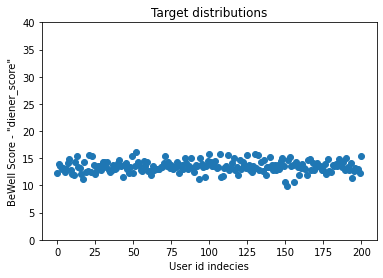

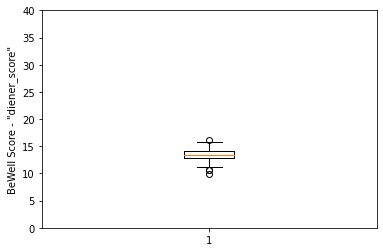

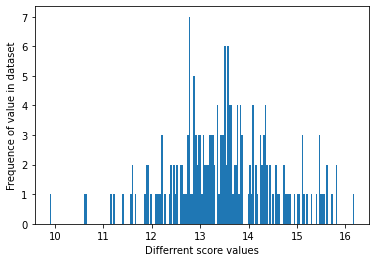

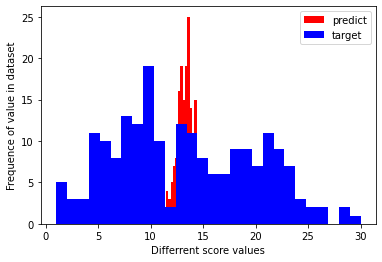

Report:
mean_squared_error: 41.94412870009087
mean_absolute_error: 5.506706401158279
r2_score -35.66163843991098
pearsonr_corr: 0.04590135240671331, pearsonr_p: 0.5176018603617298



In [30]:
join_data = join_text_and_score(base_info, files, use_post_text=True, period=1, target_type="diener_score")
X_train, X_test, y_train, y_test = train_test_split(
    join_data["f_texts"],
    join_data["f_score"], 
    test_size=0.2,
    random_state=42
)
pipe = Pipeline([
    ('tf', TfidfVectorizer(
               lowercase = True, 
               ngram_range = (1,3), 
               #max_features = 900,
               max_df = 0.95,
               min_df = 5,
               #analyzer = "char"
            )
    ), 
    ('pca', TruncatedSVD(500)), 
    ('lr', Ridge())
])
pipe.fit(X_train, y_train)
predicted_y = pipe.predict(X_test)
plot_target_ditribution(predicted_y, y_lim=(0,40),  postfix="diener_score")
plot_two_distributions(predicted_y, y_test)
get_metrics(predicted_y, y_test)

### Who score + text post

100%|██████████| 1874/1874 [01:09<00:00, 26.78it/s]


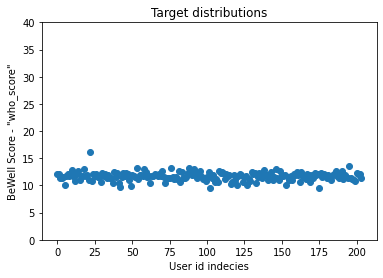

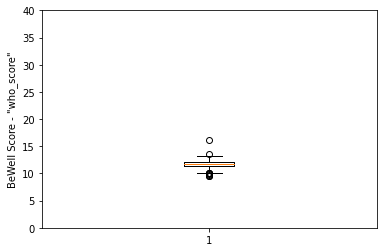

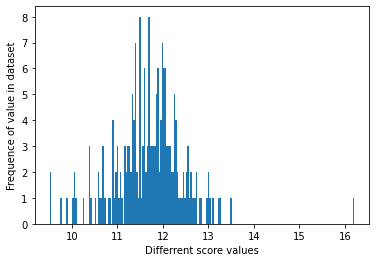

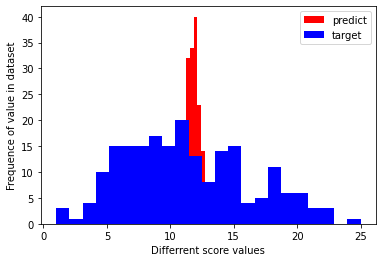

Report:
mean_squared_error: 22.46456759719107
mean_absolute_error: 3.903666816004384
r2_score -35.96955277948357
pearsonr_corr: 0.1427170263864168, pearsonr_p: 0.0417185510587307



In [31]:
join_data = join_text_and_score(base_info, files, use_post_text=True, period=1, target_type="who_score")
X_train, X_test, y_train, y_test = train_test_split(
    join_data["f_texts"],
    join_data["f_score"], 
    test_size=0.2,
    random_state=42
)
pipe = Pipeline([
    ('tf', TfidfVectorizer(
               lowercase = True, 
               ngram_range = (1,3), 
               #max_features = 900,
               max_df = 0.95,
               min_df = 3,
               #analyzer = "char"
            )
    ), 
    ('pca', TruncatedSVD(500)), 
    ('lr', Ridge())
])
pipe.fit(X_train, y_train)
predicted_y = pipe.predict(X_test)
plot_target_ditribution(predicted_y, y_lim=(0,40),  postfix="who_score")
plot_two_distributions(predicted_y, y_test)
get_metrics(predicted_y, y_test)

### NoPCA

100%|██████████| 1874/1874 [00:30<00:00, 61.19it/s]


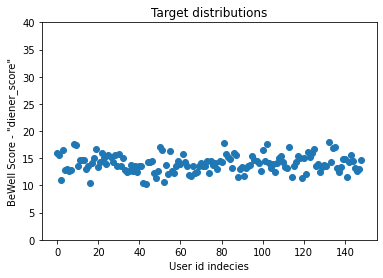

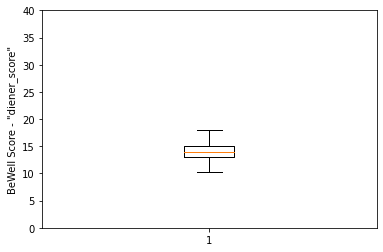

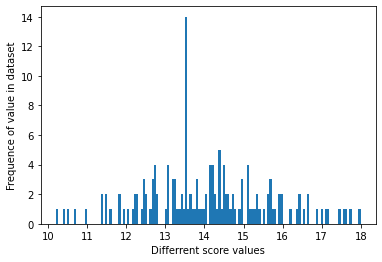

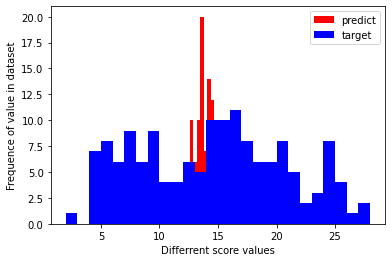

Report:
mean_squared_error: 39.487716328138035
mean_absolute_error: 5.300103103512452
r2_score -14.519050509539175
pearsonr_corr: 0.15008169741040786, pearsonr_p: 0.06771273349549536



In [33]:
join_data = join_text_and_score(base_info, files, use_post_text=False, period=1, target_type="diener_score")
X_train, X_test, y_train, y_test = train_test_split(
    join_data["f_texts"],
    join_data["f_score"], 
    test_size=0.2,
    random_state=42
)
pipe = Pipeline([
    ('tf', TfidfVectorizer(
               lowercase = True, 
               ngram_range = (1,3), 
               #max_features = 900,
               max_df = 0.95,
               min_df = 5,
               #analyzer = "char"
            )
    ), 
    #('pca', TruncatedSVD(500)), 
    ('lr', Ridge())
])
pipe.fit(X_train, y_train)
predicted_y = pipe.predict(X_test)
plot_target_ditribution(predicted_y, y_lim=(0,40),  postfix="diener_score")
plot_two_distributions(predicted_y, y_test)
get_metrics(predicted_y, y_test)

### MLPRegressor 

In [36]:
from sklearn.neural_network import MLPRegressor

join_data = join_text_and_score(base_info, files, use_post_text=False, period=1, target_type="diener_score")
X_train, X_test, y_train, y_test = train_test_split(
    join_data["f_texts"],
    join_data["f_score"], 
    test_size=0.2,
    random_state=42
)

100%|██████████| 1874/1874 [00:26<00:00, 71.79it/s] 


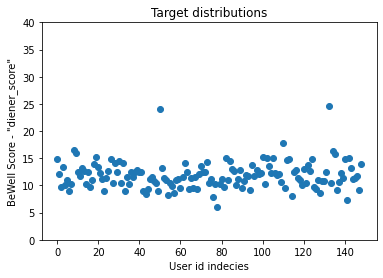

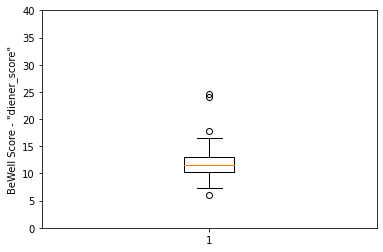

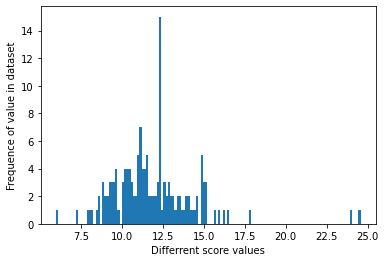

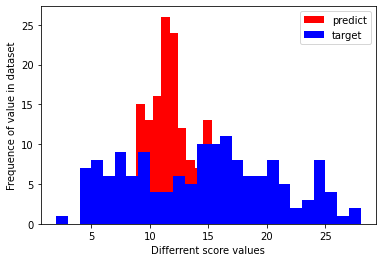

Report:
mean_squared_error: 46.30584808532277
mean_absolute_error: 5.590029458670573
r2_score -6.368179397198195
pearsonr_corr: 0.14535769319014102, pearsonr_p: 0.07693053332906949



In [39]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(
               lowercase = True, 
               ngram_range = (1,3), 
               #max_features = 900,
               max_df = 0.95,
               min_df = 2,
               #analyzer = "char"
            )
    ), 
    #('pca', TruncatedSVD(500)), 
    ('lr', MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(300, 150)))
])
pipe.fit(X_train, y_train)
predicted_y = pipe.predict(X_test)
plot_target_ditribution(predicted_y, y_lim=(0,40),  postfix="diener_score")
plot_two_distributions(predicted_y, y_test)
get_metrics(predicted_y, y_test)